# Notation:
#    Training Error: $J_{train}(\theta^d)$
#    Cross Validation Error: $J_{CV}(\theta^d)$
#    Test Error: $J_{test}(\theta^d)$

# Evaluating a Hypothesis

![title](img/p1.png)

# Model Selection and Train/Validation/Test Sets

![title](img/p2.png)

# Diagnosing Bias vs. Variance

![title](img/p3.png)

# Underfitting and Overfitting

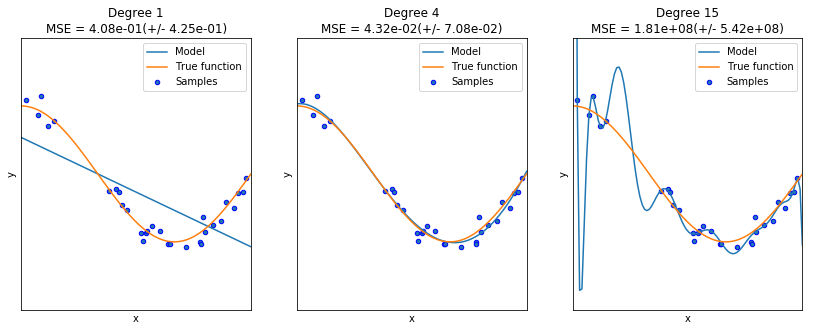

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Regularization 
![title](img/p4.png)
# Iterative Method : Create a list of $\lambda$ $\rightarrow$ a list of models $\rightarrow$ choose the one with best $J_{CV}(\theta^d)$ (without Regularization)

# Learning Curve
![title](img/p5.png)
# TO DO:
# High Bias: Adding features;  Adding polynomial features;  Decreasing λ
# High Variance: Getting more training examples;  Trying smaller sets of features;  Increasing λ
# A neural network with fewer parameters is prone to underfitting 
# A neural network with more parameters is prone to overfitting

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

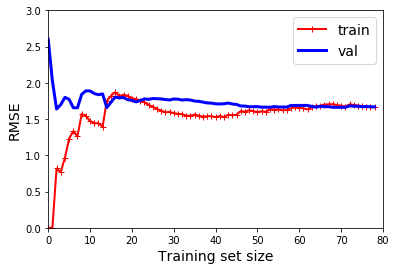

In [6]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
#save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

# Skewed Data
# Dataset with low true error: 0.50% VS 1% with our Model
# Precision = $\dfrac{True Positive}{True Positive + False Positive}$;    From what we detect, how many correct
# Recall = $\dfrac{True Positive}{True Positive + False Negative}$;    From all the correct, how many we detect
# Depends on cases
# $F_1Score= \dfrac{2PR}{P+R}$
